### Тема: Локальные особенности. Детекторы.

1.	Выделить характерные угловые точки на произвольном изображении при помощи детектора углов Харриса (cv2.cornerHarris()) и детектора углов Ши Томаси (cv2.goodFeaturesToTrack()). Сравните результаты.

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\vladk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


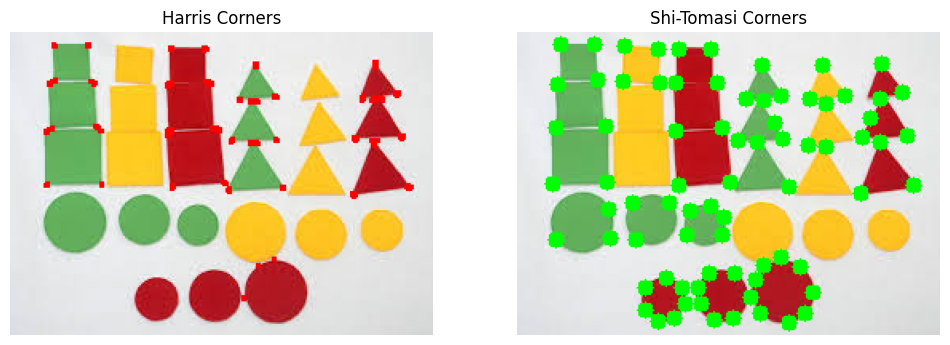

In [ ]:
%pip install opencv-python numpy matplotlib
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Загрузка изображения
img = cv2.imread('1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris
gray_harris = np.float32(gray)
dst = cv2.cornerHarris(gray_harris, 2, 3, 0.04) #k=0.04 "строгость" поиска (меньше = найдёт больше углов)
dst = cv2.dilate(dst, None)
img_harris = img.copy()
img_harris[dst > 0.01 * dst.max()] = [0, 0, 255]

# Shi-Tomasi
img_shi = img.copy()
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10) #0.01 насколько "качественными" должны быть углы
corners = corners.astype(int)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img_shi, (x, y), 5, (0,255,0), -1)

# Визуализация
fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
axs[0].set_title('Harris Corners')
axs[1].imshow(cv2.cvtColor(img_shi, cv2.COLOR_BGR2RGB))
axs[1].set_title('Shi-Tomasi Corners')
for ax in axs:
    ax.axis('off')
plt.show()

2.	Для выполнения этого задания используйте фото с изображением нескольких лиц. При помощи классификатора Хаара определите на фото область лиц, глаз и улыбки (см. https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html#face-detection)

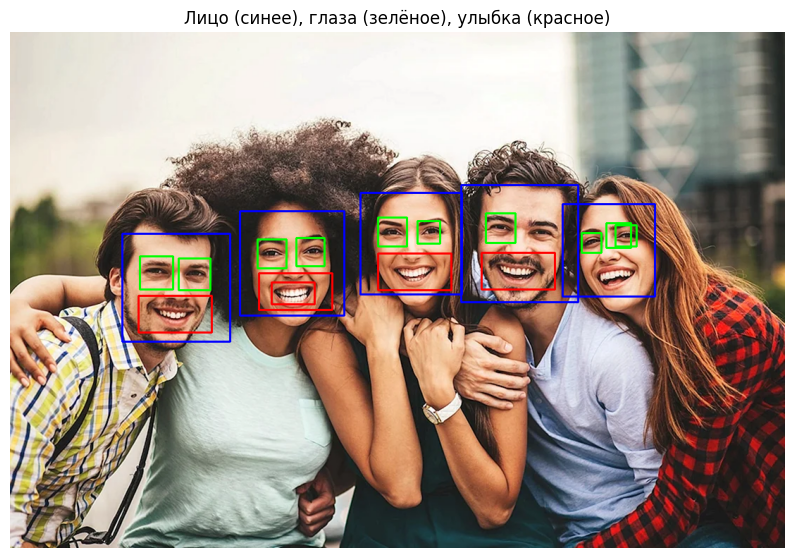

In [32]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

img = cv2.imread('2.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
    smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.7, minNeighbors=22)
    for (sx,sy,sw,sh) in smiles:
        cv2.rectangle(roi_color, (sx,sy), (sx+sw, sy+sh), (0,0,255), 2)

plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Лицо (синее), глаза (зелёное), улыбка (красное)')
plt.show()

3.	Выведите видео с камеры ноутбука и детектируйте лицо (глаза, нос …) на видео при помощи классификатора Хаара.

In [1]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
#C:\Users\vladk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\cv2\data
nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml') 

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0,255,0), 2)
        noses = nose_cascade.detectMultiScale(roi_gray, 1.3, 5)
        for (nx,ny,nw,nh) in noses:
            cv2.rectangle(roi_color, (nx,ny), (nx+nw, ny+nh), (255,255,0), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

4.	Практическая задача. Используя знания из прошлой лабораторной работы выровняйте изображение любого документа, сфотографированного под углом (визитки, карточки, чеки, листок с текстом и прочее). Фото сделайте самостоятельно. Ссылка на готовое решение дана в лекции. Можно предложить свое решение.

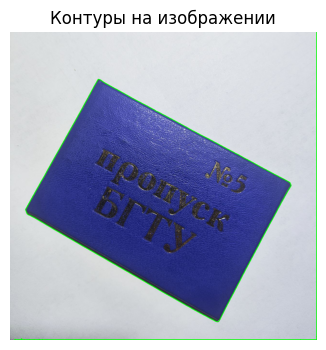

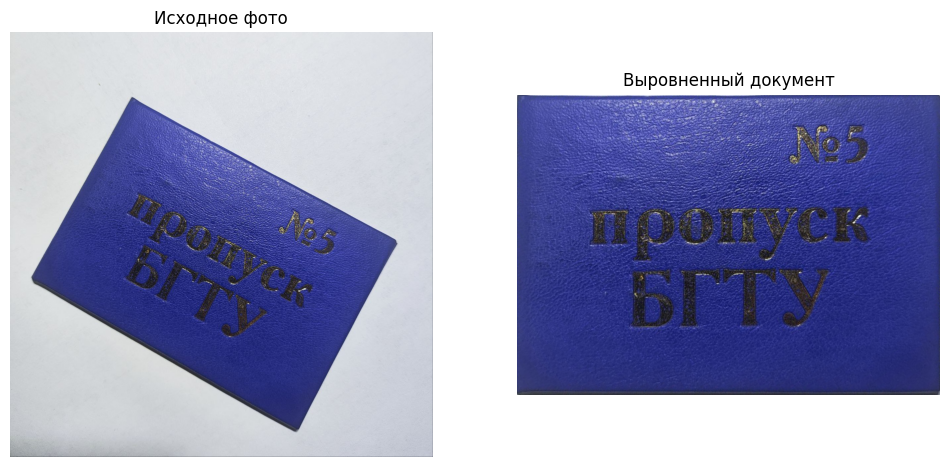

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def order_points(pts):
    # Функция для правильного порядка точек
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]       # верхний левый
    rect[2] = pts[np.argmax(s)]       # нижний правый
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]    # верхний правый
    rect[3] = pts[np.argmax(diff)]    # нижний левый
    return rect
#Верхний левый = точка с наименьшей суммой (x + y)
#Нижний правый = точка с наибольшей суммой (x + y)
#Верхний правый = точка с наименьшей разностью (x - y)
#Нижний левый = точка с наибольшей разностью (x - y)

#Выравнивание перспективы
def four_point_transform(image, pts):
    rect = order_points(pts)
    (tl, tr, br, bl) = rect
    
    # Вычисляем размеры нового изображения
    widthA = np.linalg.norm(br - bl)  # ширина по низу
    widthB = np.linalg.norm(tr - tl)  # ширина по верху
    maxWidth = max(int(widthA), int(widthB))
    
    heightA = np.linalg.norm(tr - br) # высота справа
    heightB = np.linalg.norm(tl - bl) # высота слева
    maxHeight = max(int(heightA), int(heightB))
    
    # Куда должны попасть наши точки после преобразования
    dst = np.array([
        [0, 0],                      # верхний левый → (0,0)
        [maxWidth - 1, 0],           # верхний правый → (ширина,0)
        [maxWidth - 1, maxHeight - 1], # нижний правый → (ширина,высота)
        [0, maxHeight - 1]], dtype="float32") # нижний левый → (0,высота)
    
    # Магия преобразования перспективы!
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    return warped

img = cv2.imread('4.jpg')
if img is None:
    raise FileNotFoundError("Файл '4.jpg' не найден!")

# Предобработка
#Поиск границ документа
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 30, 150)
#Поиск контура документа
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img.copy()
cv2.drawContours(img_contours, contours, -1, (0,255,0), 2)

plt.figure(figsize=(8, 4))
plt.title('Контуры на изображении')
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Поиск контура документа (четырёхугольника)
docCnt = None
contours = sorted(contours, key=cv2.contourArea, reverse=True)
for c in contours:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    if len(approx) == 4:
        docCnt = approx
        break

if docCnt is None:
    raise Exception("Документ не найден! Попробуйте другие пороги, освещение, или изображение.")

# Выровнять изображение
warped = four_point_transform(img, docCnt.reshape(4, 2))

# Визуализация результата
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Исходное фото')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Выровненный документ')
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

1. Что такое локальные особенности на изображении?

Локальные особенности — это уникальные точки, области или структуры изображения, легко отличимые от окружающих пикселей.
Они стабильны при масштабировании, вращении, изменении освещённости.
Примеры: углы, пересечения, точки с резким изменением яркости, текстурные элементы.
Используются для поиска соответствий между изображениями, распознавания объектов, слежения.

2. Какие детекторы используют для поиска особых точек?

Популярные детекторы:

Harris Corner Detector (детектор углов Харриса) — ищет углы.
Shi-Tomasi (GoodFeaturesToTrack) — ищет устойчивые углы.
SIFT (Scale-Invariant Feature Transform) — масштабно-инвариантные точки.
SURF (Speeded Up Robust Features) — ускоренный аналог SIFT.
ORB (Oriented FAST and Rotated BRIEF) — быстрый и бесплатный, подходит для мобильных устройств.
FAST (Features from Accelerated Segment Test) — быстрый детектор углов.
AKAZE — устойчив к изменениям масштаба и вращению.

3. Что такое дескриптор особых точек?

Дескриптор — это числовой вектор, который описывает локальное окружение найденной особой точки.
Он нужен для сравнения и сопоставления точек между изображениями.
Дескриптор должен быть устойчив к шуму, масштабу, повороту, освещённости.
Примеры: SIFT, SURF, BRIEF, ORB, FREAK.

4. Расскажите принцип работы детектора углов Харриса.

Для каждого пикселя считается матрица градиентов в окрестности.
С помощью этой матрицы вычисляется “мера угловости” (Harris response).
Если эта мера выше порога — точка считается углом.
Детектор чувствителен к изменениям направления градиента, поэтому хорошо находит пересечения линий и углы.
Формула учитывает смещение окна в разные направления; если смещение сильно меняет изображение — это угол.

5. Что представляют собой признаки Хаара? Как с их помощью находят определенные области на изображении?

Признаки Хаара — это простые шаблоны: разность суммы яркости светлых и тёмных прямоугольников в окне.
Применяются к разным областям изображения, быстро вычисляются через интегральное изображение.
Для поиска используется множество таких признаков, обученных на примерах (например, лиц).
Если сумма признаков для области похожа на обученные примеры — область считается содержащей объект (лицо, глаз и т.д.).

6. В чем заключается алгоритм метода Виолы – Джонса? Почему используется каскад признаков?

Алгоритм состоит из:
Вычисления множества простых признаков Хаара.
Быстрого фильтрации окон на изображении с помощью каскада слабых классификаторов (каждый — по простому признаку).
Если окно прошло все этапы каскада — считается, что объект найден.
Каскад признаков:
Это последовательность этапов, где каждый этап — набор простых признаков.
На первых этапах быстро отбрасываются “неинтересные” области, на последних — более точная проверка.
Это ускоряет работу: большинство фрагментов отсекаются рано.

7. Что представляет из себя обученный классификатор? (структура XML-файла классификатора)

Это XML-файл, содержащий параметры обученного каскада:
Размер окна классификатора.
Структура каскада (этапы, признаки).
Веса признаков, пороги.
Описание каждого признака: его тип, положение, размеры.
Внутри — иерархия <cascade>, <stage>, <feature>, <rect>, <tree>, <_> и т.д.
Пример структуры:
XML
<cascade>
  <size>24 24</size>
  <stages>
    <stage>
      <trees>
        <_>
          <feature>
            <rects>
              <_>x y width height weight</_>
              ...
            </rects>
            <tilted>0</tilted>
          </feature>
          <threshold>...</threshold>
          <left_val>...</left_val>
          <right_val>...</right_val>
        </_>
        ...
      </trees>
      <stage_threshold>...</stage_threshold>
      <parent>...</parent>
      <next>...</next>
    </stage>
    ...
  </stages>
</cascade>
Классификатор загружается функцией OpenCV и используется для поиска объектов.